In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from google.colab import files

# Upload your cleaned dataset (titanic_cleaned.csv)
uploaded = files.upload()
df = pd.read_csv("titanic_cleaned.csv")

df.head()


Saving titanic_cleaned.csv to titanic_cleaned.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [2]:
# Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop unnecessary or text-based columns (like Name, Ticket, Cabin if present)
df = df.select_dtypes(include=[np.number]).dropna()

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

print("Data shape after scaling:", X_scaled.shape)


Data shape after scaling: (891, 9)


In [3]:
# Choose number of clusters (try 2 for simplicity)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataset
df['Cluster'] = clusters

# Show sample results
df[['Survived', 'Cluster']].head(10)


,Survived,Cluster
0,0,0
1,1,1
2,1,0
3,1,1
4,0,0
5,0,0
6,0,1
7,0,0
8,1,1
9,1,1


In [4]:
cluster_summary = df.groupby('Cluster')['Survived'].value_counts(normalize=True).unstack().fillna(0)
print("Cluster vs Survived distribution:")
print(cluster_summary)


Cluster vs Survived distribution:
Survived         0         1
Cluster                     
0         0.795380  0.204620
1         0.235088  0.764912


In [5]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]


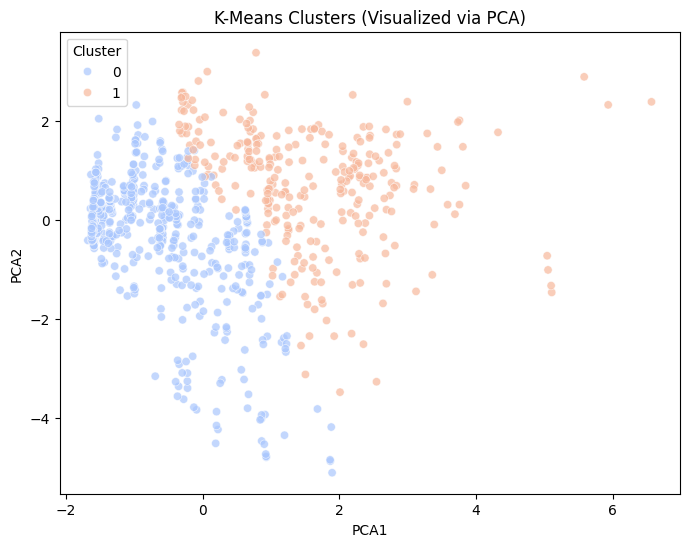

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='coolwarm',
    data=df,
    alpha=0.7
)
plt.title("K-Means Clusters (Visualized via PCA)")
plt.show()


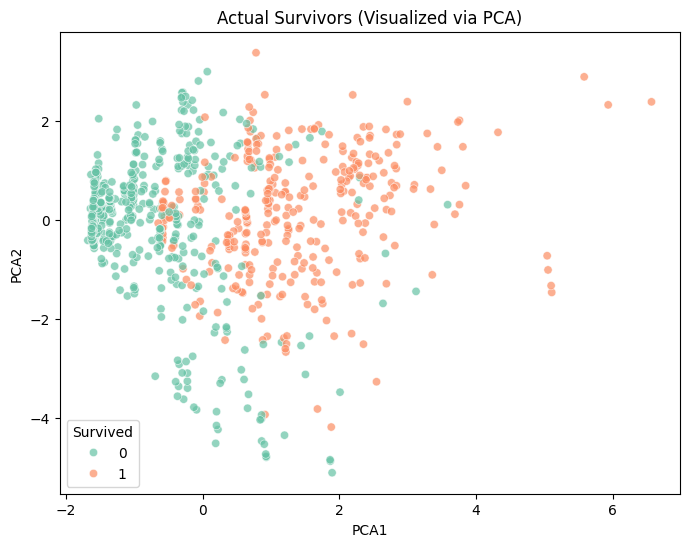

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Survived',
    palette='Set2',
    data=df,
    alpha=0.7
)
plt.title("Actual Survivors (Visualized via PCA)")
plt.show()
